<a href="https://colab.research.google.com/github/derrickgzq/fyp/blob/main/fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Granger-causality for PPI and CPI in Malaysia


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
import plotly.express as px

Get data from github

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/fyp/main/fyp%20data.csv')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').rename_axis('Indexes', axis=1)

EDA

In [ ]:
df.head()

Indexes,PPI,CPI
date,,
2010-01-01,98.4,99.4
2010-02-01,98.4,99.4
2010-03-01,99.9,99.4
2010-04-01,99.8,99.4
2010-05-01,98.6,99.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    158 non-null    datetime64[ns]
 1   PPI     158 non-null    float64       
 2   CPI     158 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.8 KB


In [ ]:
df.describe()

,PPI,CPI
count,158.000000,158.000000
mean,107.968354,114.484810
std,6.045339,8.444432
min,98.400000,99.400000
25%,103.800000,106.375000
50%,107.500000,115.200000
75%,112.200000,121.100000
max,124.100000,129.800000


Visualizations

<Axes: xlabel='date'>

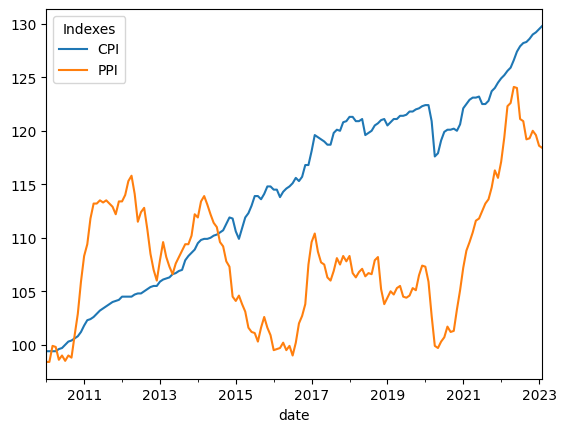

In [ ]:
df.plot( y = ['CPI','PPI'])

In [ ]:
fig = px.line(df,  y = ['CPI','PPI'], title = 'CPI and PPI in Malaysia')
fig.show()

Test for stationarity

In [ ]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [ ]:
print('ADF Test: PPI time series')
adf_test(df['PPI'])
print('ADF Test: CPI time series')
adf_test(df['CPI'])

ADF Test: PPI time series
ADF Statistics: -2.078314
p-value: 0.253323
Critical values:
	1%: -3.473
	5%: -2.880
	10%: -2.577
ADF Test: CPI time series
ADF Statistics: -0.446475
p-value: 0.902045
Critical values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


ADF tests show PPI and CPI aren't stationary

In [ ]:
def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

In [ ]:
print('KPSS Test: PPI time series')
kpss_test(df['PPI'])
print('KPSS Test: CPI time series')
kpss_test(df['CPI'])

KPSS Test: PPI time series
KPSS Statistic: 0.27624653438342345
p-value: 0.1
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: CPI time series
KPSS Statistic: 1.8161060327078424
p-value: 0.01
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
df_diff = df.diff().dropna()

In [ ]:
df_diff

Indexes,PPI,CPI
date,,
2010-02-01,0.0,0.0
2010-03-01,1.5,0.0
2010-04-01,-0.1,0.0
2010-05-01,-1.2,0.2
2010-06-01,0.4,0.1
...,...,...
2022-10-01,0.1,0.3
2022-11-01,0.7,0.4
2022-12-01,-0.4,0.2


In [ ]:
fig = px.line(df_diff, facet_col = 'Indexes', facet_col_wrap = 1)
fig.update_yaxes(matches = None)
fig.show()

In [ ]:
print('KPSS Test: PPI time series')
kpss_test(df_diff['PPI'])
print('KPSS Test: CPI time series')
kpss_test(df_diff['CPI'])
print('ADF Test: PPI time series')
adf_test(df_diff['PPI'])
print('ADF Test: CPI time series')
adf_test(df_diff['CPI'])

KPSS Test: PPI time series
KPSS Statistic: 0.100521385330511
p-value: 0.1
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: CPI time series
KPSS Statistic: 0.06243919387668234
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
ADF Test: PPI time series
ADF Statistics: -7.739012
p-value: 0.000000
Critical values:
	1%: -3.473
	5%: -2.880
	10%: -2.577
ADF Test: CPI time series
ADF Statistics: -9.314616
p-value: 0.000000
Critical values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




VAR model

In [ ]:
model = VAR(df_diff)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
  results = model.fit(i)
  print('Lag Order =', i)
  print('AIC : ', results.aic)
  print('BIC : ', results.bic)
  print('FPE : ', results.fpe)
  print('HQIC: ', results.hqic, '\n')

Lag Order = 1
AIC :  -1.2944247284495671
BIC :  -1.177122574324585
FPE :  0.2740580746659341
HQIC:  -1.2467816723368885 

Lag Order = 2
AIC :  -1.317153604811145
BIC :  -1.120803597267968
FPE :  0.2679087556056135
HQIC:  -1.2374006450744823 

Lag Order = 3
AIC :  -1.2777617353219775
BIC :  -1.0016751351025566
FPE :  0.2786952576158017
HQIC:  -1.1656160522610488 

Lag Order = 4
AIC :  -1.2410368869562163
BIC :  -0.8845147785571063
FPE :  0.2891629429580904
HQIC:  -1.096211700549387 

Lag Order = 5
AIC :  -1.2031761072785936
BIC :  -0.7655091897876852
FPE :  0.3003913451381323
HQIC:  -1.0253806041404714 

Lag Order = 6
AIC :  -1.1510884193606308
BIC :  -0.6315567918295842
FPE :  0.3165627499532075
HQIC:  -0.9400276781248852 

Lag Order = 7
AIC :  -1.10044194898112
BIC :  -0.4983148901618688
FPE :  0.33317061659846386
HQIC:  -0.8558168640745174 

Lag Order = 8
AIC :  -1.0521779628189551
BIC :  -0.3667137050864344
FPE :  0.3498740416733018
HQIC:  -0.7736851665922098 

Lag Order = 9
AIC :  

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Lag order 2 is chose because lowest AIC

In [ ]:
results = model.fit(maxlags = 2, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Apr, 2023
Time:                     14:13:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.12080
Nobs:                     155.000    HQIC:                  -1.23740
Log likelihood:          -327.792    FPE:                   0.267909
AIC:                     -1.31715    Det(Omega_mle):        0.251426
--------------------------------------------------------------------
Results for equation PPI
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.090893         0.100412            0.905           0.365
L1.PPI         0.458190         0.082609            5.546           0.000
L1.CPI        -0.097585         0.199082           -0.490           0.624
L2.PPI        -0

Check whether is PPI a predictive of CPI

In [ ]:
for i in [1,2,3]:
  grangercausalitytests(df[['CPI', 'PPI']], maxlag = [i])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0464  , p=0.1546  , df_denom=154, df_num=1
ssr based chi2 test:   chi2=2.0862  , p=0.1486  , df=1
likelihood ratio test: chi2=2.0725  , p=0.1500  , df=1
parameter F test:         F=2.0464  , p=0.1546  , df_denom=154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.9018  , p=0.0005  , df_denom=151, df_num=2
ssr based chi2 test:   chi2=16.3269 , p=0.0003  , df=2
likelihood ratio test: chi2=15.5278 , p=0.0004  , df=2
parameter F test:         F=7.9018  , p=0.0005  , df_denom=151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.1530  , p=0.0006  , df_denom=148, df_num=3
ssr based chi2 test:   chi2=19.3320 , p=0.0002  , df=3
likelihood ratio test: chi2=18.2181 , p=0.0004  , df=3
parameter F test:         F=6.1530  , p=0.0006  , df_denom=148, df_num=3


Check whether CPI is a predictive of PPI

In [ ]:
for i in [1,2,3]:
  grangercausalitytests(df[['PPI', 'CPI']], maxlag = [i])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0300  , p=0.8628  , df_denom=154, df_num=1
ssr based chi2 test:   chi2=0.0306  , p=0.8612  , df=1
likelihood ratio test: chi2=0.0306  , p=0.8612  , df=1
parameter F test:         F=0.0300  , p=0.8628  , df_denom=154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0874  , p=0.9163  , df_denom=151, df_num=2
ssr based chi2 test:   chi2=0.1806  , p=0.9136  , df=2
likelihood ratio test: chi2=0.1805  , p=0.9137  , df=2
parameter F test:         F=0.0874  , p=0.9163  , df_denom=151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0756  , p=0.9731  , df_denom=148, df_num=3
ssr based chi2 test:   chi2=0.2375  , p=0.9713  , df=3
likelihood ratio test: chi2=0.2373  , p=0.9714  , df=3
parameter F test:         F=0.0756  , p=0.9731  , df_denom=148, df_num=3


Granger-Causality matrix

In [ ]:
maxlag = 2
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_diff, variables = df_diff.columns)

,PPI_x,CPI_x
PPI_y,1.0000,0.489
CPI_y,0.0001,1.000
